# 1. ARIMA / SARIMA

### 📌 Step 1: Install Required Libraries

In [1]:
!pip install pandas numpy statsmodels matplotlib seaborn yfinance pmdarima

### 📌 Step 2: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import yfinance as yf

### 📌 Step 3: Download Interest Rate Data (US 10-Year Treasury Yield)

Fetch historical data for US 10Y Treasury Yield from Yahoo Finance

In [3]:
start_date = "2000-01-01"
end_date = "2023-12-31"
treasury_yield = yf.download("^TNX", start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### 📌 Step 4: Explore the Data

In [4]:
print(treasury_yield.head())
print(treasury_yield.info())

Price       Close   High    Low   Open Volume
Ticker       ^TNX   ^TNX   ^TNX   ^TNX   ^TNX
Date                                         
2000-01-03  6.548  6.603  6.498  6.498      0
2000-01-04  6.485  6.548  6.485  6.530      0
2000-01-05  6.599  6.599  6.508  6.521      0
2000-01-06  6.549  6.585  6.540  6.558      0
2000-01-07  6.504  6.595  6.504  6.545      0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6031 entries, 2000-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, ^TNX)   6031 non-null   float64
 1   (High, ^TNX)    6031 non-null   float64
 2   (Low, ^TNX)     6031 non-null   float64
 3   (Open, ^TNX)    6031 non-null   float64
 4   (Volume, ^TNX)  6031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 282.7 KB
None


### 📌 Step 5: Visualize the Time Series

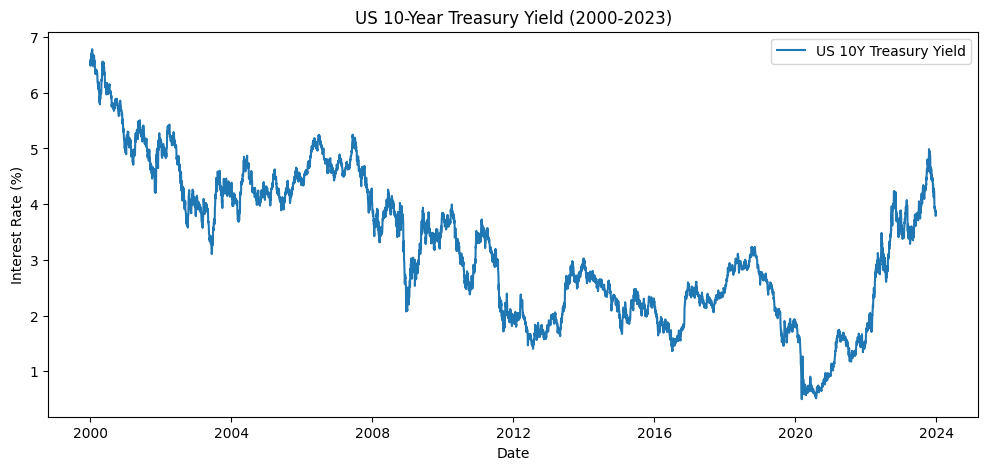

In [5]:
plt.figure(figsize=(12,5))
plt.plot(treasury_yield['Close'], label='US 10Y Treasury Yield')
plt.title('US 10-Year Treasury Yield (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

### 📌 Step 6: Stationarity Test (ADF Test)

In [6]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Test:")
    print(f"Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Conclusion: The series is" + (" stationary" if result[1] < 0.05 else " NOT stationary"))

adf_test(treasury_yield['Close'])

ADF Test:
Statistic: -2.599509641026232
p-value: 0.09309865702484832
Conclusion: The series is NOT stationary


### 📌 Step 7: Differentiation (If Needed) for Stationarity

In [7]:
treasury_yield['Close_diff'] = treasury_yield['Close'].diff()

treasury_yield.dropna(inplace=True)

Repeat the ADF test


In [8]:
tre_yield_diff = treasury_yield['Close_diff']
adf_test(tre_yield_diff)

ADF Test:
Statistic: -57.794087447380065
p-value: 0.0
Conclusion: The series is stationary


In [9]:
treasury_yield['Close_diff2'] = treasury_yield['Close_diff'].diff()
adf_test(treasury_yield['Close_diff2'].dropna())

ADF Test:
Statistic: -21.559137248995423
p-value: 0.0
Conclusion: The series is stationary


### 📌 Step 8: Visualize the Differentiated Series

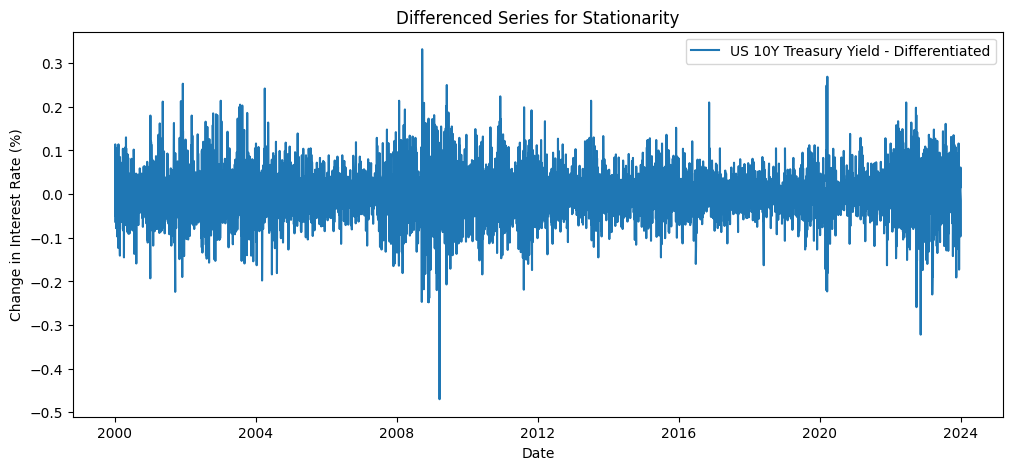

In [10]:
plt.figure(figsize=(12,5))
plt.plot(treasury_yield['Close_diff'], label='US 10Y Treasury Yield - Differentiated')
plt.title('Differenced Series for Stationarity')
plt.xlabel('Date')
plt.ylabel('Change in Interest Rate (%)')
plt.legend()
plt.show()

### 📌 Step 9: Identify ARIMA Parameters (p, d, q)

ACF and PACF plots

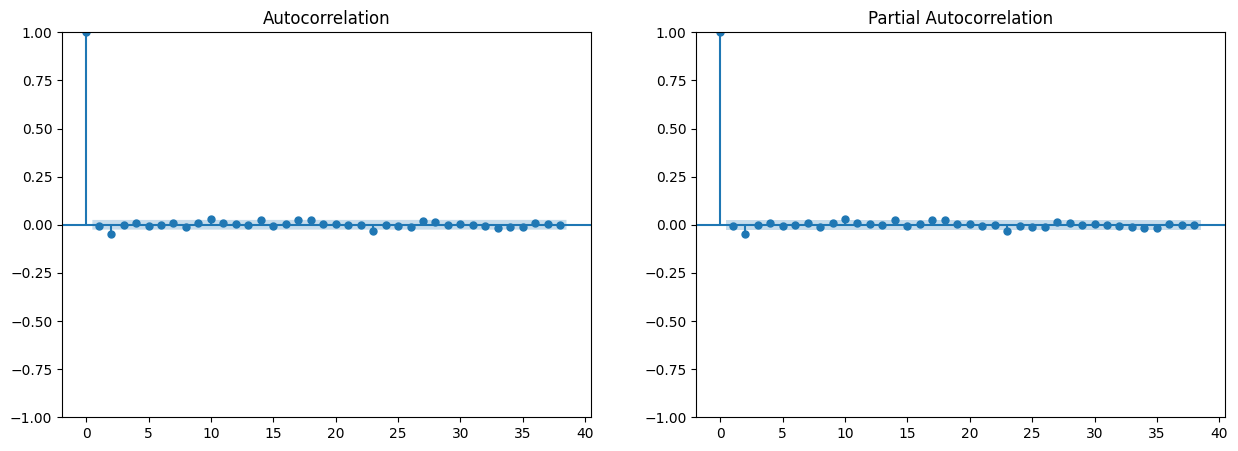

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_acf(treasury_yield['Close_diff'].dropna(), ax=ax[0])
plot_pacf(treasury_yield['Close_diff'].dropna(), ax=ax[1])
plt.show()

### 📌 Step 10: Fit ARIMA Model

In [12]:
p, d, q = 1, 2, 1
arima_model = ARIMA(treasury_yield['Close'], order=(p, d, q))
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Display model summary

In [13]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                   ^TNX   No. Observations:                 6030
Model:                 ARIMA(1, 2, 1)   Log Likelihood                8589.938
Date:                Mon, 03 Mar 2025   AIC                         -17173.875
Time:                        22:24:00   BIC                         -17153.763
Sample:                             0   HQIC                        -17166.893
                               - 6030                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0050      0.010     -0.500      0.617      -0.025       0.015
ma.L1         -0.9998      0.001   -684.752      0.000      -1.003      -0.997
sigma2         0.0034   4.21e-05     80.332      0.0

### 📌 Step 11: Forecast Using ARIMA

Forecast for the next 30 days

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


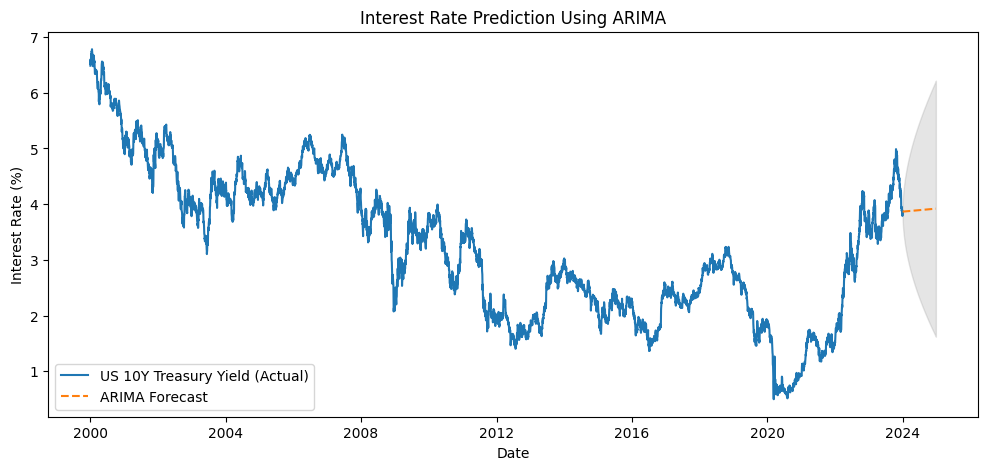

In [14]:
forecast_object = arima_result.get_forecast(steps=360)
forecast_mean = forecast_object.predicted_mean
confidence_intervals = forecast_object.conf_int()

plt.figure(figsize=(12,5))
plt.plot(treasury_yield['Close'], label='US 10Y Treasury Yield (Actual)')
plt.plot(pd.date_range(start=treasury_yield.index[-1], periods=360, freq='D'), forecast_mean, label='ARIMA Forecast', linestyle='dashed')


plt.fill_between(pd.date_range(start=treasury_yield.index[-1], periods=360, freq='D'),
                 confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2)

plt.title('Interest Rate Prediction Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

### 📌 Step 12: Evaluate Model Performance

Root Mean Squared Error (RMSE)

In [15]:
y_pred = arima_result.predict(start=len(treasury_yield)-100, end=len(treasury_yield)-1)
y_true = treasury_yield['Close'][-100:]
rmse = np.sqrt(np.mean((y_pred - y_true)**2))
print(f'RMSE: {rmse}')

RMSE: nan


### 📌 Step 13: Automated Model Selection with Auto-ARIMA (Optional)

In [16]:
auto_model = auto_arima(treasury_yield['Close'], seasonal=False, trace=True, suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17195.031, Time=6.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17188.104, Time=2.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17186.264, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17186.281, Time=4.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17189.767, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17196.588, Time=1.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17198.568, Time=3.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-17196.616, Time=4.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17185.098, Time=2.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-17194.901, Time=3.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17200.189, Time=2.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17187.941, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17198.207, Time=2.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-17198.235, Time=3.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17190.409, Time=1.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-17196.520, Time=1.37 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 42.152 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6030
Model:               SARIMAX(0, 1, 2)   Log Likelihood                8603.095
Date:                Mon, 03 Mar 2025   AIC                         -17200.189
Time:                        22:24:43   BIC                         -17180.076
Sample:                             0   HQIC                        -17193.206
                               - 6030                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0056      0.010     -0.548      0.584      -0.0

In [17]:
auto_forecast = auto_model.predict(n_periods=360)


y_true_auto = treasury_yield['Close'][-100:]
y_pred_auto = auto_model.predict(n_periods=100)

rmse_auto = np.sqrt(np.mean((y_pred_auto - y_true_auto)**2))
print(f'Auto-ARIMA RMSE: {rmse_auto}')

Auto-ARIMA RMSE: nan


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.p